# Лабораторная работа №2
### РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ. МЕТОДЫ КОЛЛОКАЦИЙ, НАИМЕНЬШИХ КВАДРАТОВ И ГАЛЕРКИНА

### Метод КОЛЛОКАЦИЙ

На отрезке [a,b] выбираются точки $$ x_{1},...,x_{m}∈[a,b] (m>=n), $$ 
которые называются точками коллокации. Точки подставляются в невязку, которая равна нулю в подставленных точках. В итоге получаем систему для определения коэффициентов $$ a_{1},...,a_{n}. $$ Обычно $$ m=n. $$ Поэтому мы получаем такую систему: $$ \begin{cases}Ψ(x_{1},a_{1},...,a_{n}) = 0,\\...................\\Ψ(x_{1},a_{1},...,a_{n}) = 0. \end{cases}$$ Решая эту систему, найдём прибилижённое решение $$ y_{n}(x) $$

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

def y_2proiz(n, x):
    if n == 0:
        return 0
    elif n == 1:
        return -2
    elif n == 2:
        return -6 * x
    else:
        return (n - 1)*(n - 2)*pow(x, n - 3) - (n + 1)*n * pow(x, n - 1)


def y(n, x):
    if n == 0:
        return 0
    else:
        return pow(x, n - 1)*(1 - x ** 2)


def q(x, betta):
    return 1 + betta * x ** 2


def f(x):
    return -1


def solve(m, alfa, betta):
    time_1 = time.clock()
    h = (b - a)/m
    x = a + h
    ans_vector  = []
    matrix = []
    x_ans = []
    while x < b:
        x_ans.append(x)
        row = []
        for g in range(1, m):
            row.append(y_2proiz(g, x) * alfa(x) + y(g, x)*q(x, betta(x)))
        matrix.append(row)
        ans_vector.append(f(x))
        x += h
        x = round(x, 4)
    a_ans = np.linalg.solve(matrix, ans_vector)
    y_ans = []
    for x_t in x_ans:
        y_app = 0
        for g in range(1, m):
            y_app += y(g, x_t)*a_ans[g - 1] #
        y_ans.append(y_app)
    time_now = time.clock()
    print(time_now - time_1)
    return (x_ans, y_ans)


a = -1
b = 1
k = 18
n = [10, 20, 50, 70, 100]

#### Задание 1. 
С коэффициентами 1, 1:

0.0005854000000056203


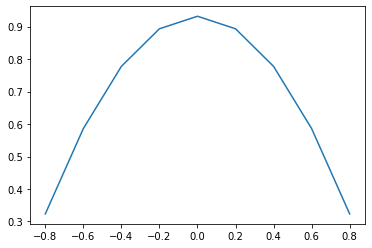

0.0028659999999973707


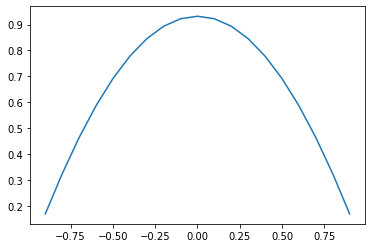

0.008887400000006096


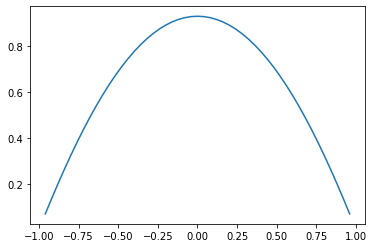

0.015995499999988283


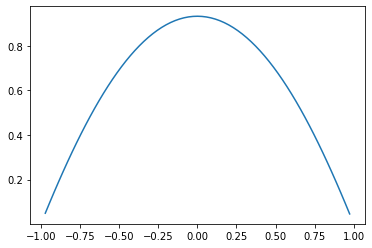

0.0314461000000108


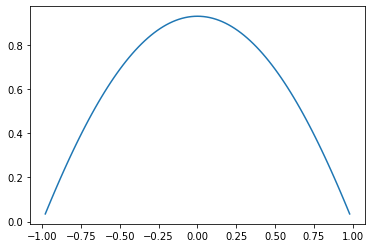

In [7]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: 1, lambda x: 1)
    plt.plot(x_k, y_k)
    plt.show()

#### Задание 2. 
С коэффициентами $$ sin(k), cos(k), $$ где k - номер варианта:

0.0005672000000060962


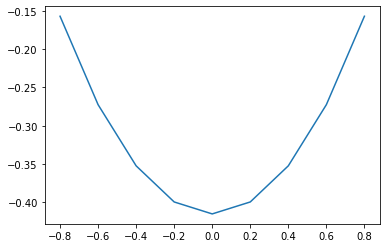

0.0027247000000016897


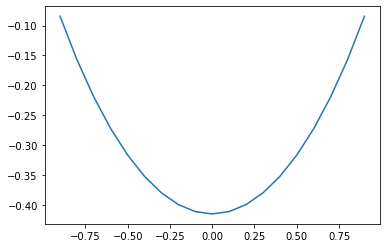

0.01721539999999777


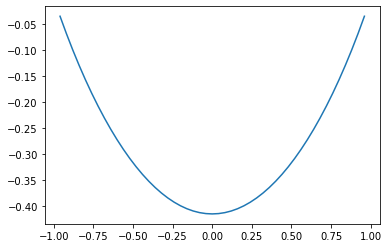

0.03180159999999432


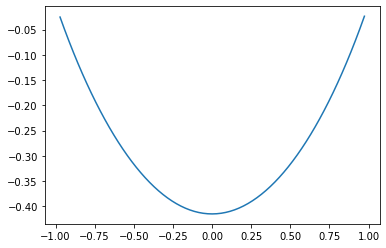

0.05659010000000819


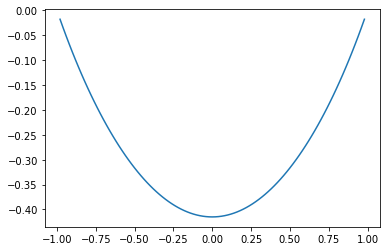

In [8]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: np.sin(k), lambda x: np.cos(k))
    plt.plot(x_k, y_k)
    plt.show()

### Метод ГАЛЕРКИНА

По базисной системе строим прриближеннок решение $$ y_{n}(x) = Ψ_{0}(x)+a_{1}Ψ_{1}(x)+...+a_{n}Ψ_{n}(x)$$
Рассматриваем невязку $$ Ψ(x,a_{1},...a_{n}) $$ и для определения коэффициентов при базисных функциях строим систему 
$$ \begin{cases}\int Ψ(x_{1},a_{1},...,a_{n})φ_{1}(x) \, dx = 0,\\...................\\\int Ψ(x_{n},a_{1},...,a_{n})φ_{n}(x) \, dx = 0. \end{cases}$$ Решая данную систему, находим значение $$ a_{1},...,a_{n}.$$

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt


def y_2proiz(n, x):
    if n == 0:
        return 0
    elif n == 1:
        return -2
    elif n == 2:
        return -6 * x
    else:
        return (n - 1)*(n - 2)*pow(x, n - 3) - (n + 1)*n * pow(x, n - 1)


def int_y_2proiz_and_fi(n, m, x):
    if n == 0:
        return 0
    elif n == 1:
        return -2 * ((x ** m)/m - (x ** (m + 2))/(m + 2))
    elif n == 2:
        return -6 * ((x ** (m + 1))/(m + 1) - (x ** (m + 3))/(m + 3))
    else:
        return (n - 1) * (n - 2) * (pow(x, m + n - 3)/(m + n - 3) - pow(x, m + n - 1)/(m + n - 1)) \
               - (n + 1) * n * (pow(x, n + m - 1)/(n + m - 1) - pow(x, n + m + 1)/(n + m + 1))


def int_y(n, m, x):
    if n == 0:
        return 0
    else:
        return pow(x, n + m - 1)/(n + m - 1) - 2 * pow(x, n + m + 1)/(n + m + 1) + pow(x, n + m + 3)/(n + m + 3) +\
               pow(x, n + m + 1)/(n + m + 1) - 2 * pow(x, n + m + 3)/(n + m + 3) + pow(x, n + m + 5)/(n + m + 5)


def y(n, x):
    if n == 0:
        return 0
    else:
        return pow(x, n - 1)*(1 - x ** 2)


def y_old(n, x):
    if n == 0:
        return 0
    else:
        return pow(x, n - 1) * (1 - x ** 2)


def q(x, betta):
    return 1 + betta * x ** 2


def f(x, n):
    return -1 * (pow(x, n)/n - pow(x, n + 2)/(n + 2))


def solve(m, alfa, betta):
    time_1 = time.clock()
    h = (b - a)/m
    ans_vector = []
    matrix = []
    x_ans = []
    x = a
    while x <= b:
        x_ans.append(x)
        x += h
        x = round(x, 4)
    for i in range(1, m):
        row = []
        for j in range(1, m):
            row.append(alfa(x) * (int_y_2proiz_and_fi(j, i, b) - int_y_2proiz_and_fi(j, i, a)) + betta(x) * (int_y(j, i, b) - int_y(j, i, a)))
        matrix.append(row)
        ans_vector.append(f(b, i) - f(a, i))
    #print(np.array(matrix))
    a_ans = np.linalg.solve(matrix, ans_vector)
    y_ans = []
    for x_t in x_ans:
        y_app = 0
        for g in range(1, m):
            y_app += y_old(g, x_t)*a_ans[g - 1]
        y_ans.append(y_app)
    time_now = time.clock()
    print(time_now - time_1)
    return (x_ans, y_ans)


a = -1
b = 1
k = 18
n = [7]

#### Задание 1. 
С коэффициентами 1, 1:

0.0009809999999959018


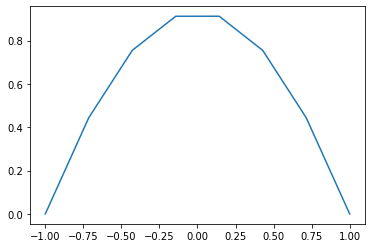

In [10]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: 1, lambda x: 1)
    plt.plot(x_k, y_k)
    plt.show()

#### Задание 2. 
С коэффициентами $$ sin(k), cos(k), $$ где k - номер варианта:

0.0012757000000078733


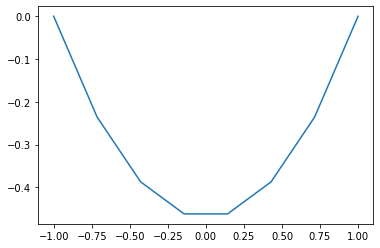

In [11]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: np.sin(k), lambda x: np.cos(k))
    plt.plot(x_k, y_k)
    plt.show()

### Метод НАИМЕНЬШИХ КВАДРАТОВ

##### Дискретный МНК
Выбирают N > n точек и решают задачу $$ S = \sum\limits_{i=1}^N Ψ^{2}(x,a_{1},...,a_{n}) ->min. $$ 
Для её решения строится система: 
$$ \begin{cases}{δS\overδa_{1}} = 0,\\........\\{δS\overδa_{n}} = 0. \end{cases}$$

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

def y_2proiz(n, x):
    if n == 0:
        return 0
    elif n == 1:
        return -2
    elif n == 2:
        return -6 * x
    else:
        return (n - 1)*(n - 2)*pow(x, n - 3) - (n + 1)*n * pow(x, n - 1)


def y(n, x):
    if n == 0:
        return 0
    else:
        return pow(x, n - 1)*(1 - x ** 2)


def q(x, betta):
    return 1 + betta * x ** 2


def f(x):
    return -1


def solve(m, alfa, betta):
    time_1 = time.clock()
    h = 0.01
    ans_vector = []
    matrix = []
    x_ans = []
    x = a + h
    while x < b:
        x_ans.append(x)
        x += h
    for j in range(1, m):
        temp_ans_f = 0
        row = []
        for k in range(1, m):
            ans = 0
            ans_f = 0
            x = a + h
            while x < b:
                ans_f += 2 * f(x) * y(j, x)
                ans += 2*(y_2proiz(k, x) * alfa(x) + y(k, x)*q(x, betta(x)))*y(j, x)
                x += h
                x = round(x, 4)
            row.append(ans)
            temp_ans_f = ans_f
        matrix.append(row)
        ans_vector.append(temp_ans_f)
    a_ans = np.linalg.solve(matrix, ans_vector)
    y_ans = []
    for x_t in x_ans:
        y_app = 0
        for g in range(1, m):
            y_app += y(g, x_t)*a_ans[g - 1]
        y_ans.append(y_app)
    time_now = time.clock()
    print(time_now - time_1)
    return (x_ans, y_ans)


a = -1
b = 1
k = 18
n = [4, 10, 20, 50, 100]

#### Задание 1. 
С коэффициентами 1, 1:

0.00648039999998673


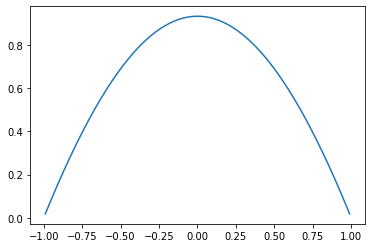

0.06020320000001789


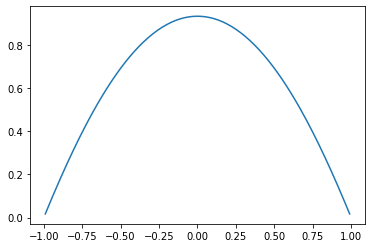

0.2638584999999978


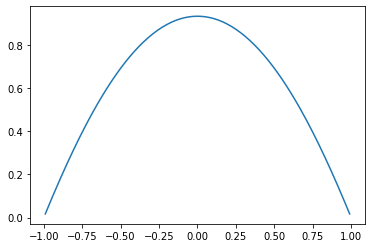

1.7813739999999996


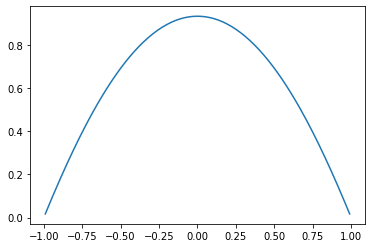

7.342222700000008


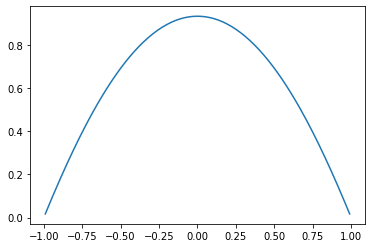

In [13]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: 1, lambda x: 1)
    plt.plot(x_k, y_k)
    plt.show()

#### Задание 2. 
С коэффициентами $$ sin(k), cos(k), $$ где k - номер варианта:

0.014689899999979161


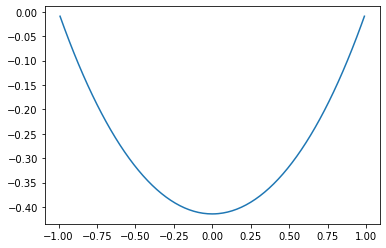

0.11924279999999499


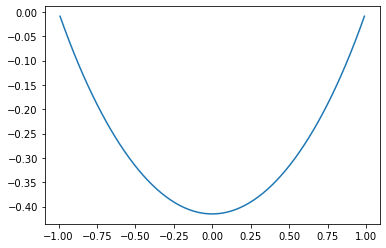

0.539309199999991


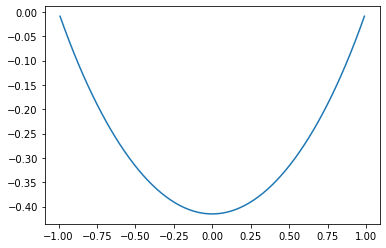

3.5963813000000187


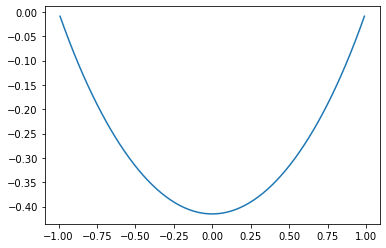

14.724794099999997


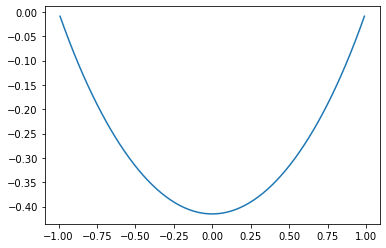

In [14]:
for i in n:
    (x_k, y_k) = solve(i, lambda x: np.sin(k), lambda x: np.cos(k))
    plt.plot(x_k, y_k)
    plt.show()

# Спасибо за внимание.